# Import Libraries

In [1]:
# First we import all neccessary libraries and give some of them an alias for easy access
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
# Read in the data so every group member can run the notebook on his machine
# (our repo is on github, we therefore have the same file structure)
df = pd.read_csv("./Data/Raw/inventory_management.csv")
df.shape # Get a first idea about the number of rows and columns of the dataset

(1722, 16)

In [3]:
# Have a first look at the data
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [4]:
# Generates descriptive statistics for numeric attributes to get first insights on the mean, missings...
df.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.00000,1722.000000,1722.0,1722.000000
mean,287.062137,92.157956,106.774681,69.319779,9.593496,0.36295,71.317904,0.0,113.292683
std,230.576241,44.452568,173.353713,40.330698,7.638531,0.48099,41.952724,0.0,43.943909
min,0.000000,0.000000,0.000000,5.960000,0.000000,0.00000,5.410000,0.0,4.000000
25%,133.000000,62.000000,0.000000,33.102500,5.000000,0.00000,33.622500,0.0,82.000000
50%,213.000000,87.000000,0.000000,66.785000,10.000000,0.00000,67.825000,0.0,108.000000
75%,367.750000,118.000000,154.750000,96.927500,15.000000,1.00000,101.585000,0.0,140.000000
max,1470.000000,315.000000,1074.000000,228.030000,25.000000,1.00000,236.040000,0.0,307.000000


# Feature Engineering

In [5]:
# Maybe the Price Difference to the Competitor has a significqnt influence on the promotion
df["Price Difference"] = df["Competitor Pricing"]-(df["Price"])

In [6]:
# We define a new unique identifier because the product id's varies between the different stores and are therefore not unique
df["Product_UID"] = df["Store ID"].astype(str) + "_" + df["Product ID"].astype(str)

In [7]:
# We create a weekday variable that we can use for our models because the normal date data can't be used to detect patterns as there are only unique values in our dataset
df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df["Date"].dt.day_name()

In [8]:
# Have a look at the new data
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Price Difference,Product_UID,Weekday
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115,13.01,S001_P0001,Saturday
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229,11.86,S001_P0002,Saturday
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157,-2.86,S001_P0003,Saturday
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52,-2.44,S001_P0004,Saturday
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59,-2.78,S001_P0005,Saturday


# Viusalizations

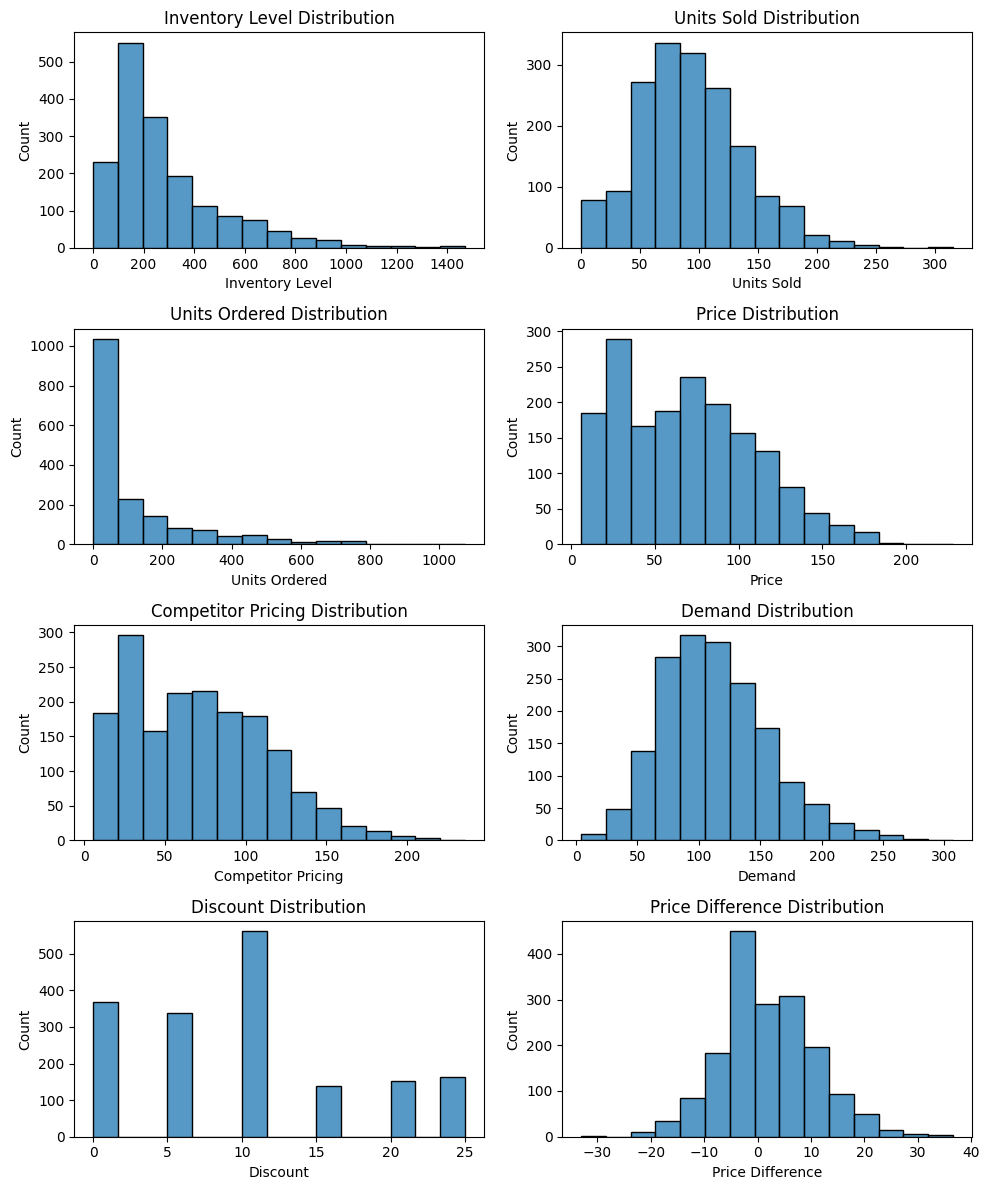

In [9]:
# Select numerical columns and visualize their frequencies
df_num = df[[
    "Inventory Level",
    "Units Sold",
    "Units Ordered",
    "Price",
    "Competitor Pricing",
    "Demand", 
    "Discount", 
    "Price Difference"
]]

# Create a 4x2 grid for every subplot
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

# Flatten the axes array for easy indexing
axes_flat = axes.flatten()

# List of (column_name, plot_title) pairs
columns_and_titles = [
    ("Inventory Level", "Inventory Level Distribution"),
    ("Units Sold", "Units Sold Distribution"),
    ("Units Ordered", "Units Ordered Distribution"),
    ("Price", "Price Distribution"),
    ("Competitor Pricing", "Competitor Pricing Distribution"),
    ("Demand", "Demand Distribution"), 
    ("Discount", "Discount Distribution"),
    ("Price Difference", "Price Difference Distribution")
]

# Loop through each column and its corresponding subplot
for idx, (col_name, title) in enumerate(columns_and_titles):
    sns.histplot(
        df_num[col_name],
        kde=False,
        bins=15,
        ax=axes_flat[idx]
    )
    axes_flat[idx].set_title(title)

# If there is an extra subplot (the 8th), turn it off
if len(axes_flat) > len(columns_and_titles):
    axes_flat[-1].axis('off')

# Adjust layout so titles and axes don’t overlap
plt.tight_layout()
plt.show()

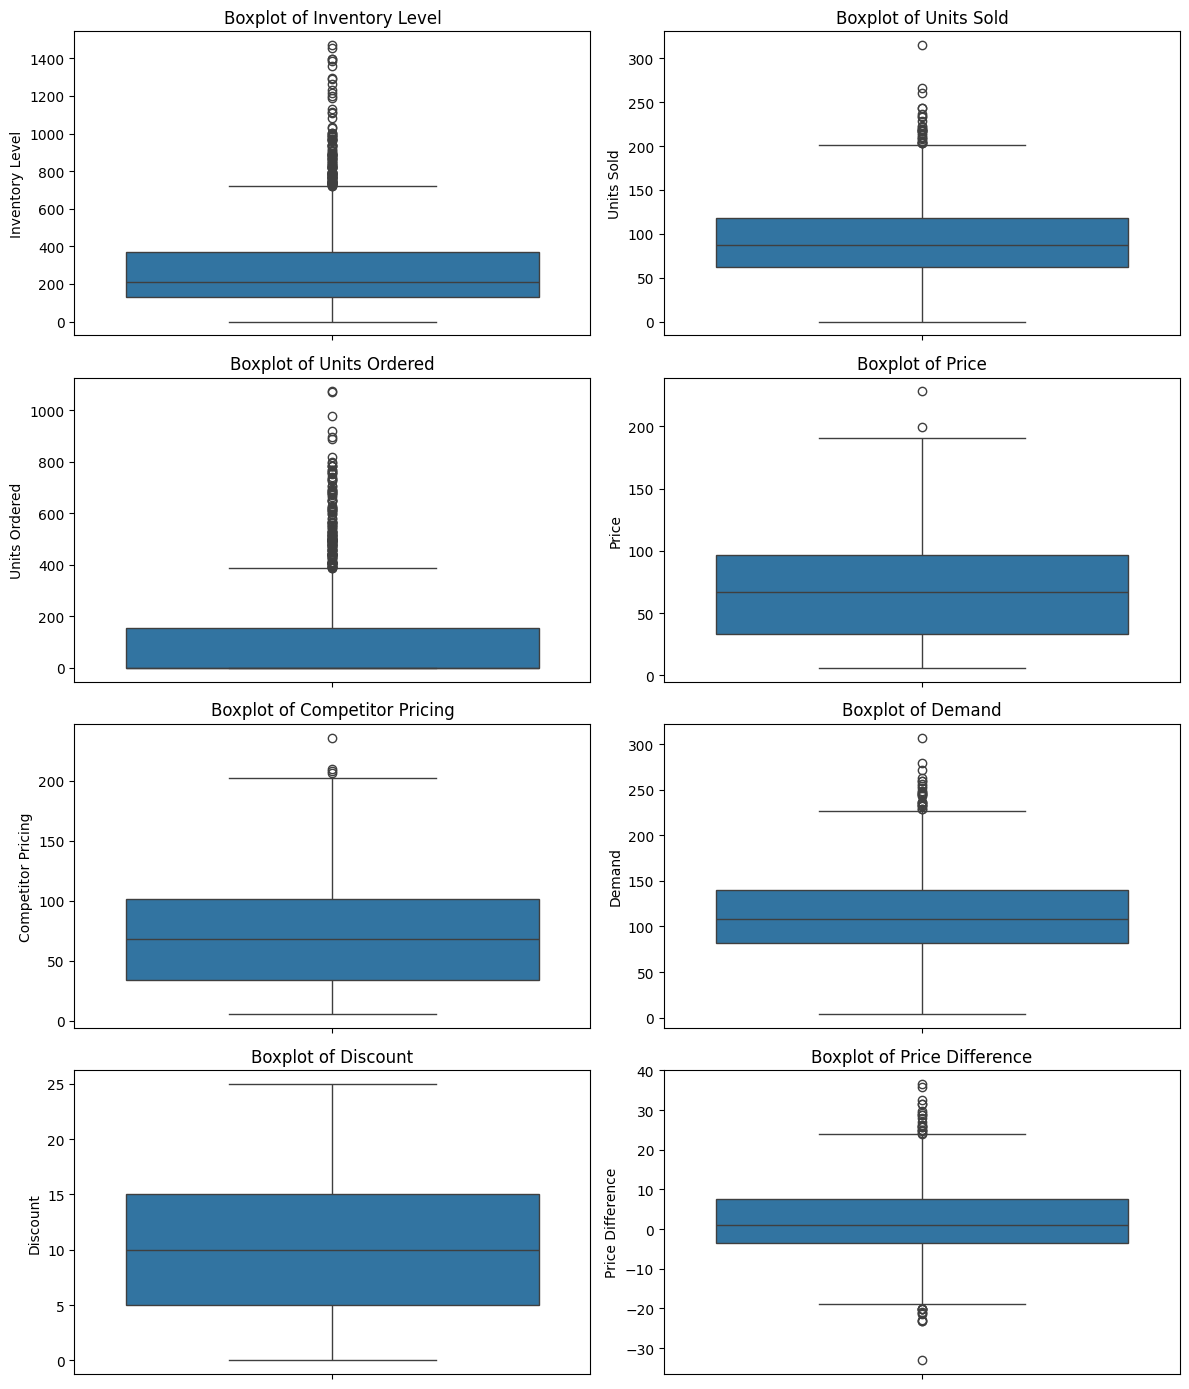

In [10]:
# We have a look at some variables to detect outliers but they all seem valid
# Create a 4x2 grid for the boxplots
fig, axes = plt.subplots(4, 2, figsize=(12, 14))
axes_flat = axes.flatten()

# Loop through numeric columns and plot boxplots
for idx, col in enumerate(df_num.columns):
    sns.boxplot(y=df_num[col], ax=axes_flat[idx])
    axes_flat[idx].set_title(f'Boxplot of {col}')

# Hide any unused subplot
if len(axes_flat) > len(df_num.columns):
    for i in range(len(df_num.columns), len(axes_flat)):
        axes_flat[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

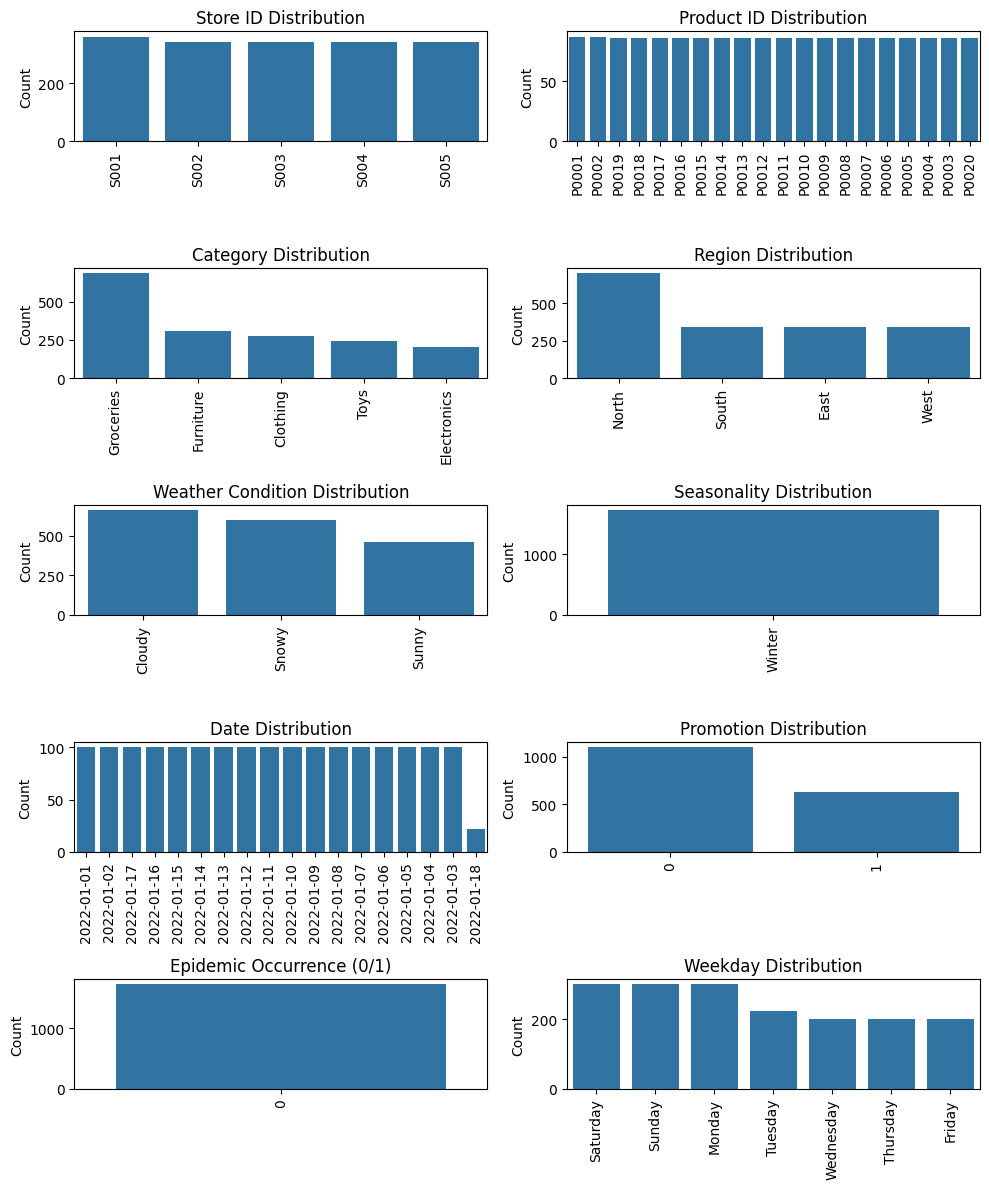

In [11]:
# Select categorical columns and visualize their frequencies, we see that epidemic and seasonality only have on value
df_cat = df[[
    "Store ID",
    "Product ID",
    "Category",
    "Region",
    "Weather Condition",
    "Seasonality", 
    "Date", 
    "Promotion", 
    "Epidemic", 
    "Weekday"
]]

# Create a 5x2 grid for every subplot
fig, axes = plt.subplots(5, 2, figsize=(10, 12))

# Flatten the axes array for easy indexing
axes_flat = axes.flatten()

# List of (column_name, plot_title) pairs
columns_and_titles = [
    ("Store ID", "Store ID Distribution"),
    ("Product ID", "Product ID Distribution"),
    ("Category", "Category Distribution"),
    ("Region", "Region Distribution"),
    ("Weather Condition", "Weather Condition Distribution"),
    ("Seasonality", "Seasonality Distribution"), 
    ("Date", "Date Distribution"), 
    ("Promotion", "Promotion Distribution"),
    ("Epidemic", "Epidemic Occurrence (0/1)"),
    ("Weekday", "Weekday Distribution")
]

# Loop through each column and its corresponding subplot
for idx, (col_name, title) in enumerate(columns_and_titles):
    sns.countplot(x=col_name, data=df_cat, ax=axes_flat[idx], order=df_cat[col_name].value_counts().index)
    axes_flat[idx].set_title(title)
    axes_flat[idx].set_xlabel("")  # remove default x-label
    axes_flat[idx].set_ylabel("Count")
    axes_flat[idx].tick_params(axis='x', rotation=90)

# Turn off any unused subplot
if len(axes_flat) > len(columns_and_titles):
    for j in range(len(columns_and_titles), len(axes_flat)):
        axes_flat[j].axis('off')

# Adjust the layout so titles and axes don’t overlap
plt.tight_layout()
plt.savefig("./Images/DataExplo.png", bbox_inches='tight', dpi=500)
plt.show()

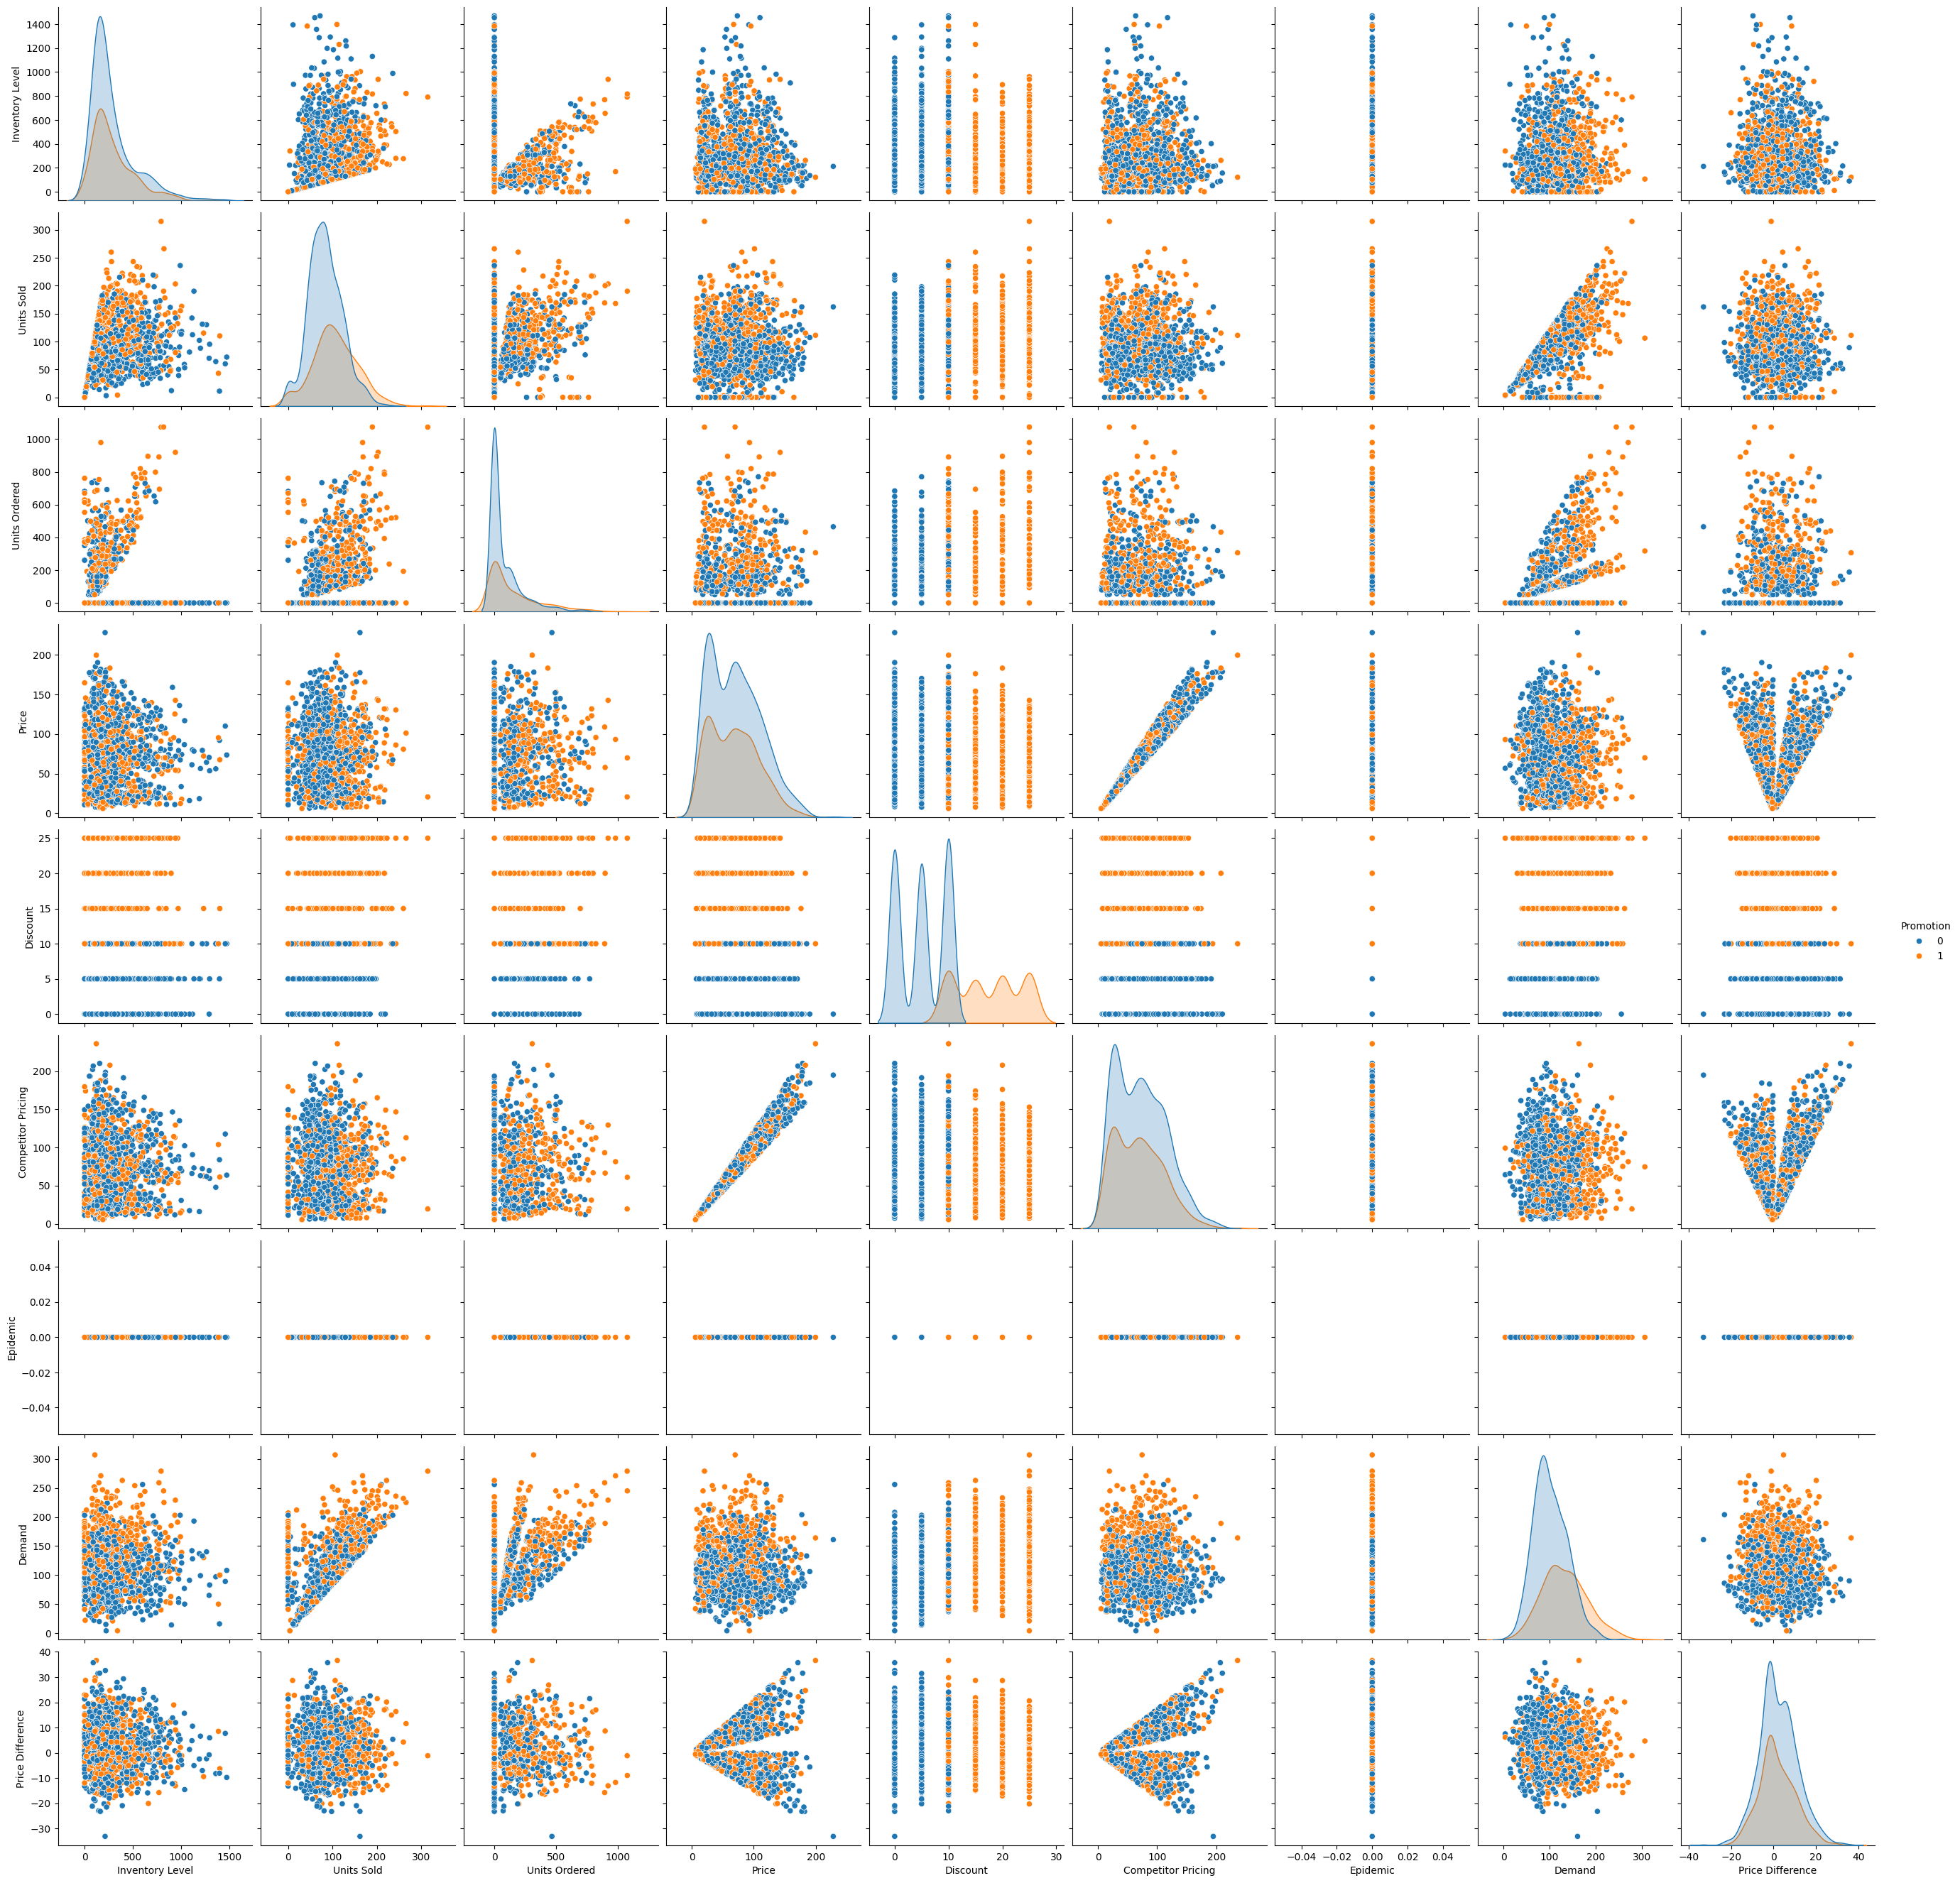

In [12]:
# Visualize correlations, detect patterns or clusters and explore how the variables interact with the target variable "promotion"
sns.pairplot(df, hue='Promotion', height = 3)
# In here you see elementary economic relationships: Higher price -> higher competitor price; the higher the demand the higher the ordered and sold units

Text(0.5, 1.0, 'Correlation Matrix')

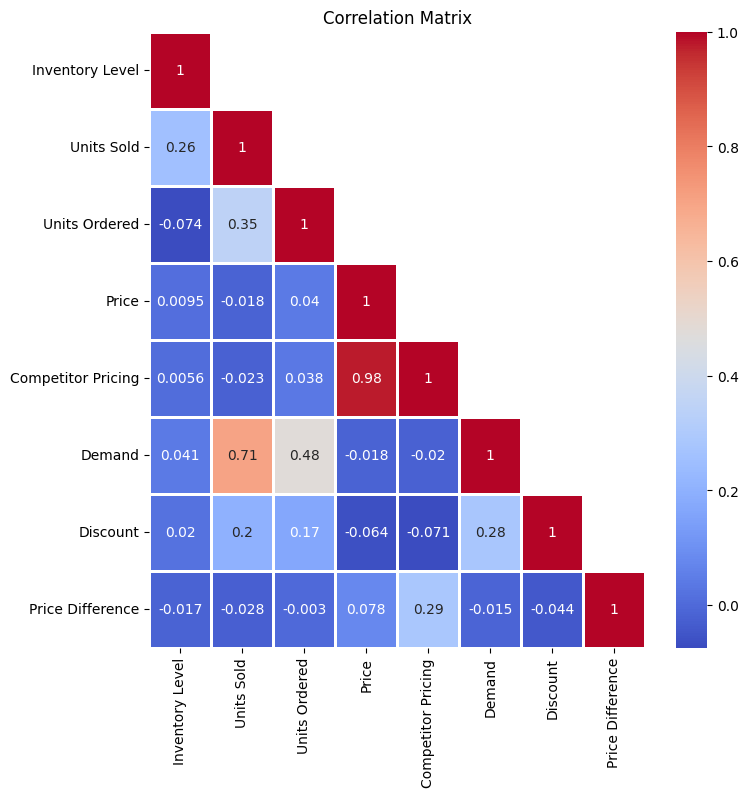

In [13]:
# We calculate the correlation between metrically scaled attributes to evaluate if we can drop one of two highly correlated attributes as they would have redundant information
# The competitor price has a very high correlation, we might kick it out
plt.figure(figsize=(8, 8)) 
mask = np.triu(df_num.corr(), k=1)
sns.heatmap(df_num.corr(), annot=True, linewidths=1, mask=mask, cmap='coolwarm')  
plt.title('Correlation Matrix')

In [14]:
# Compute the Spearman correlation with the binary target 'Promotion' (pearson can't be used here as promotion is categorial!)
df_num["Promotion"] = df["Promotion"]
correlations = df_num.corrwith(df_num['Promotion'], method='spearman')
print(correlations.sort_values(ascending=False))

Promotion             1.000000
Discount              0.773272
Demand                0.316620
Units Sold            0.231254
Units Ordered         0.172194
Inventory Level       0.042670
Price Difference     -0.025784
Price                -0.029329
Competitor Pricing   -0.036255
dtype: float64


/var/folders/pp/1927lwv95077fczr94x8z_g40000gn/T/ipykernel_82024/637095906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Promotion"] = df["Promotion"]


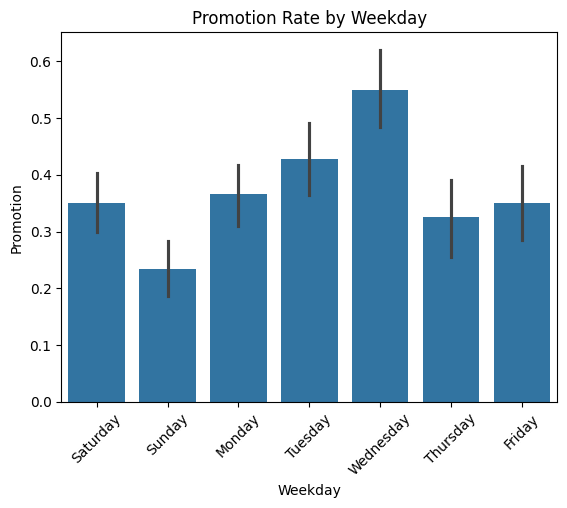

In [15]:
# We now plot the relationships detected in the correlation analysis
# We graphically check if the promotion rate is influenced by the weekdays
sns.barplot(data=df, x='Weekday', y='Promotion')
plt.title("Promotion Rate by Weekday")
plt.xticks(rotation=45)
plt.show()

In [16]:
# To statistically check if weekdays and the promotion have some relationship or if they are independant, we use the Chi-squared test as weekdays are nominally scaled
contingency_table = pd.crosstab(df['Weekday'], df['Promotion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected) 

Chi-Square Value: 57.742360757840785
P-value: 1.292310569511393e-10
Degrees of Freedom: 6
Expected Frequencies:
[[127.40998839  72.59001161]
 [191.11498258 108.88501742]
 [191.11498258 108.88501742]
 [191.11498258 108.88501742]
 [127.40998839  72.59001161]
 [141.42508711  80.57491289]
 [127.40998839  72.59001161]]


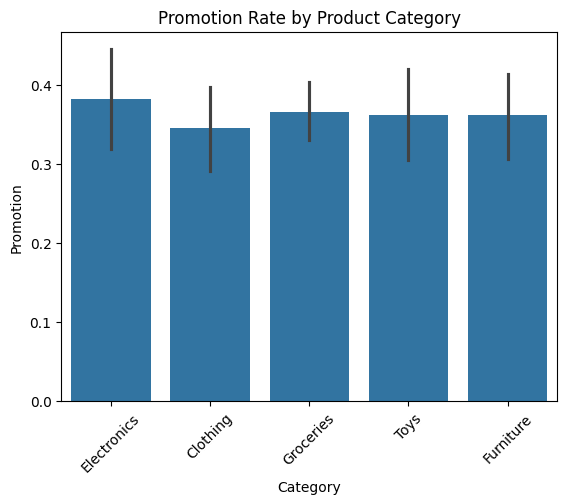

In [17]:
# We graphically check if the promotion rate is influenced by the product category
sns.barplot(data=df, x='Category', y='Promotion')
plt.title("Promotion Rate by Product Category")
plt.xticks(rotation=45)
plt.show()

In [18]:
# To statistically check if the Product Category and the promotion have some relationship or if they are independant, we use the Chi-squared test as Product categories are nominally scaled
contingency_table = pd.crosstab(df['Category'], df['Promotion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected) 

Chi-Square Value: 0.6984565029488455
P-value: 0.9515191293236329
Degrees of Freedom: 4
Expected Frequencies:
[[175.18873403  99.81126597]
 [131.86933798  75.13066202]
 [197.485482   112.514518  ]
 [437.6533101  249.3466899 ]
 [154.80313589  88.19686411]]


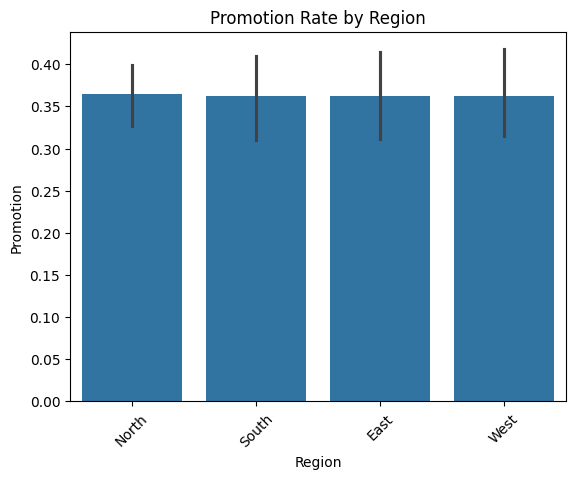

In [19]:
# We graphically check if the promotion rate is influenced by the region
sns.barplot(data=df, x='Region', y='Promotion')
plt.title("Promotion Rate by Region")
plt.xticks(rotation=45)
plt.show()

In [20]:
# To statistically check if Region and the promotion have some relationship or if they are independant, we use the Chi-squared test as Regions are nominally scaled
contingency_table = pd.crosstab(df['Region'], df['Promotion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected) 

Chi-Square Value: 0.009743311875054622
P-value: 0.9997449592208563
Degrees of Freedom: 3
Expected Frequencies:
[[216.59698026 123.40301974]
 [445.93495935 254.06504065]
 [217.87108014 124.12891986]
 [216.59698026 123.40301974]]


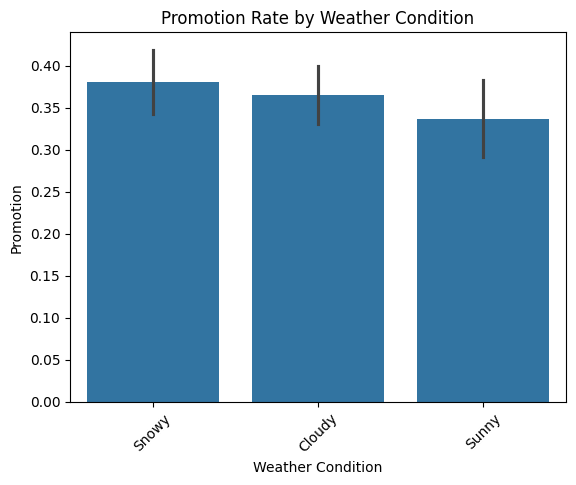

In [21]:
# We graphically check if the promotion rate is influenced by the weather condition, it somehow is a little influenced
sns.barplot(data=df, x='Weather Condition', y='Promotion')
plt.title("Promotion Rate by Weather Condition")
plt.xticks(rotation=45)
plt.show()

In [22]:
# To statistically check if the Weater Condition and the promotion have some relationship or if they are independant, we use the Chi-squared test as the Weather Condition are nominally scaled
contingency_table = pd.crosstab(df['Region'], df['Promotion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected) 

Chi-Square Value: 0.009743311875054622
P-value: 0.9997449592208563
Degrees of Freedom: 3
Expected Frequencies:
[[216.59698026 123.40301974]
 [445.93495935 254.06504065]
 [217.87108014 124.12891986]
 [216.59698026 123.40301974]]


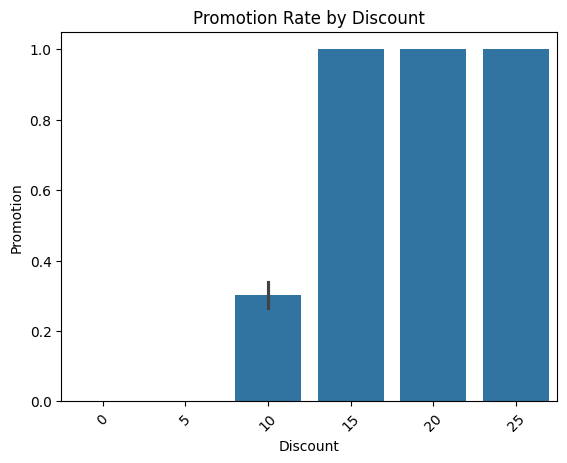

In [23]:
# We graphically check if the promotion rate is influenced by the discount
# We see here that a general dicount doesn't mean that the product is always promoted but we see a huge influence
sns.barplot(data=df, x='Discount', y='Promotion')
plt.title("Promotion Rate by Discount")
plt.xticks(rotation=45)
plt.show()

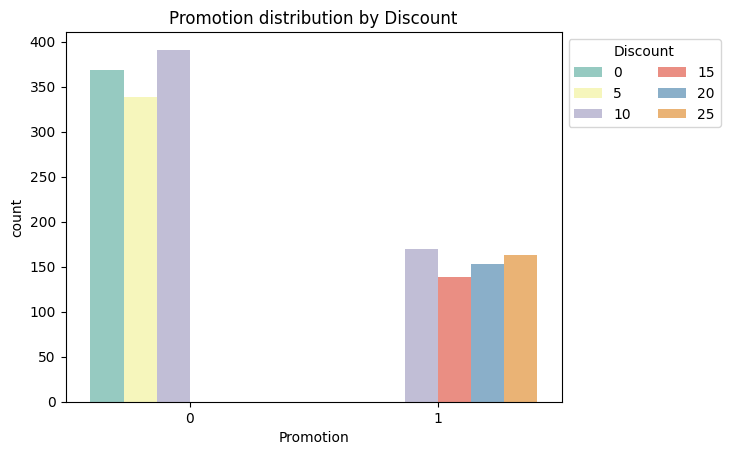

In [24]:
# We visualize this relationship with another plot for our presenation as we see that discount has a huge influence
sns.countplot(x='Promotion', hue='Discount', data=df, palette="Set3")
plt.title('Promotion distribution by Discount')
plt.legend (title='Discount', bbox_to_anchor=(1, 1), loc='upper left', ncol=2)
plt.show()

In [25]:
# To statistically check if Discount and the promotion have some relationship or if they are independant, we use the Chi-squared test as Promotion is nominally scaled
contingency_table = pd.crosstab(df['Discount'], df['Promotion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected) 

Chi-Square Value: 1209.5606556724952
P-value: 2.495041937319201e-259
Degrees of Freedom: 5
Expected Frequencies:
[[234.43437863 133.56562137]
 [215.32288037 122.67711963]
 [357.38501742 203.61498258]
 [ 88.54994193  50.45005807]
 [ 97.46864111  55.53135889]
 [103.83914053  59.16085947]]


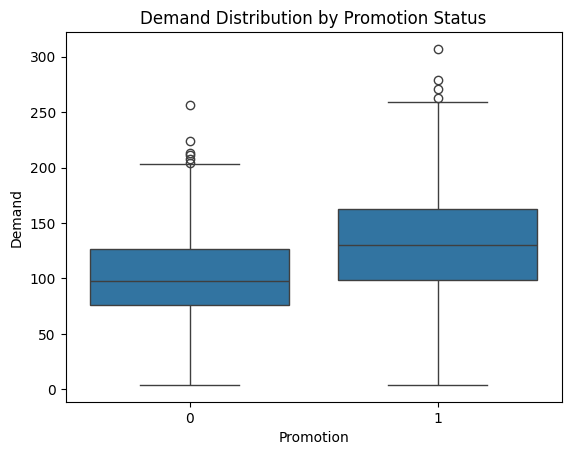

In [26]:
# We graphically check if the promotion rate is influenced by the demand
# We saw that the means differ per promotion category so demand influences our target variable (also seen in correlation analysis)
sns.boxplot(data=df, x='Promotion', y='Demand')
plt.title("Demand Distribution by Promotion Status")
plt.show()

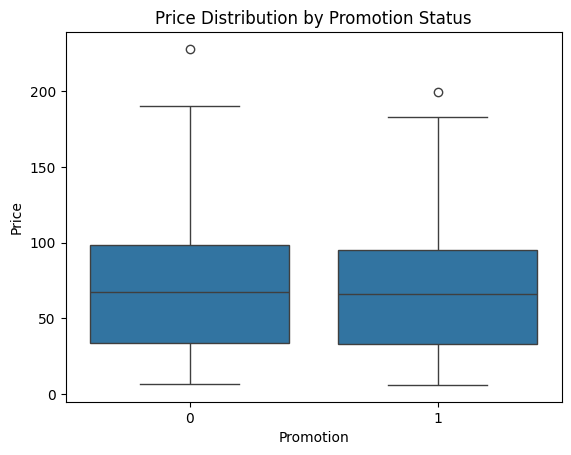

In [27]:
# We graphically check if the promotion rate is influenced by the price
sns.boxplot(data=df, x='Promotion', y='Price')
plt.title("Price Distribution by Promotion Status")
plt.show()

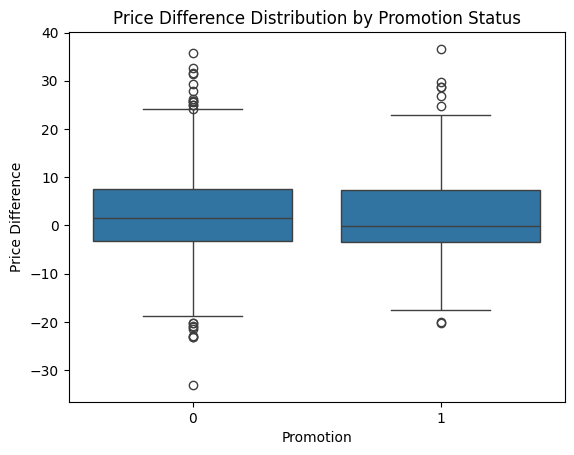

In [28]:
# We graphically check if the promotion rate is influenced by the Price Difference
sns.boxplot(data=df, x='Promotion', y='Price Difference')
plt.title("Price Difference Distribution by Promotion Status")
plt.show()

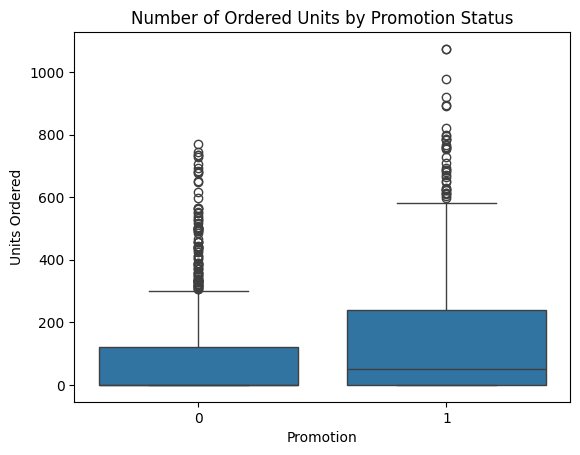

In [29]:
# We graphically check if the promotion rate is influenced by the number of ordered units
sns.boxplot(data=df, x='Promotion', y='Units Ordered')
plt.title("Number of Ordered Units by Promotion Status")
plt.show()

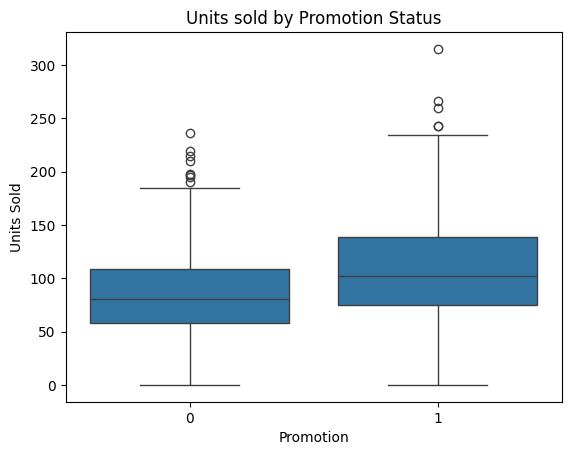

In [30]:
# We graphically check if the promotion rate is influenced by the number of sold units
sns.boxplot(data=df, x='Promotion', y='Units Sold')
plt.title("Units sold by Promotion Status")
plt.show()

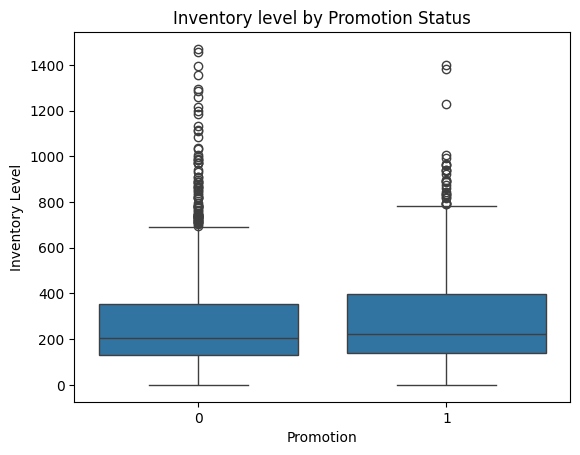

In [31]:
# We graphically check if the promotion rate is influenced by the inventory level
sns.boxplot(data=df, x='Promotion', y='Inventory Level')
plt.title("Inventory level by Promotion Status")
plt.show()

In [32]:
# As seen in the visualizations, the column had no influence so we drop it again to not bias further models
df.drop(columns=["Price Difference"], inplace=True)

In [33]:
# Check if the column is correctly removed
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Product_UID,Weekday
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115,S001_P0001,Saturday
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229,S001_P0002,Saturday
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157,S001_P0003,Saturday
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52,S001_P0004,Saturday
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59,S001_P0005,Saturday


In [34]:
# We store the cleaned data 
df.to_csv("./Data/Transformed/inventory_management_feature_engineering.csv", index=False)

['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Weather Condition', 'Promotion', 'Competitor Pricing', 'Seasonality', 'Epidemic', 'Demand', 'Product_UID', 'Weekday']


Text(0.5, 1.0, 'Correlation Matrix')

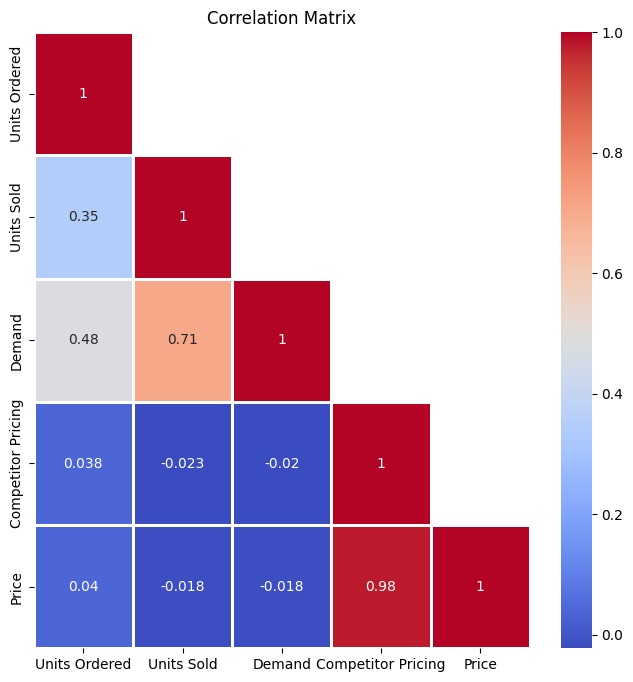

In [35]:
# Just for presentation purposes we create another Correlation matrix
print(df.columns.tolist())

plt.figure(figsize=(8, 8)) 
df_corr = df[['Units Ordered', 'Units Sold', 'Demand', 'Competitor Pricing', 'Price']]
mask = np.triu(df_corr.corr(), k=1)
sns.heatmap(df_corr.corr(), annot=True, linewidths=1, mask=mask, cmap='coolwarm')  

plt.title('Correlation Matrix')

Saved to: ./Images/Exploring_the_data_1.png


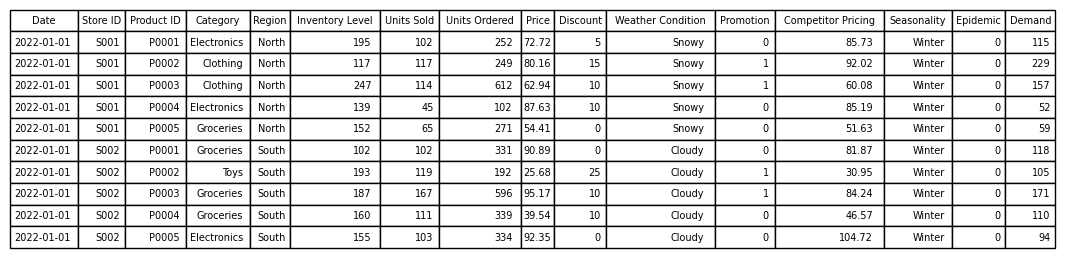

In [36]:
# This only stores some data tables for our presentation
import matplotlib.table as tbl
import os

# Load the data
file_path = "./Data/Raw/inventory_management.csv"
df = pd.read_csv(file_path)

# Filter S001 and S002
filtered_df = df[df['Store ID'].isin(['S001', 'S002'])]
s001_sample = filtered_df[filtered_df['Store ID'] == 'S001'].head(5)
s002_sample = filtered_df[filtered_df['Store ID'] == 'S002'].head(5)
sample_combined = pd.concat([s001_sample, s002_sample])

# Create figure
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')

# Create table
table = tbl.table(
    ax,
    cellText=sample_combined.values,
    colLabels=sample_combined.columns,
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1.0, 1.3)

# Adjust column widths based on content
try:
    table.auto_set_column_width(col=list(range(len(sample_combined.columns))))
except AttributeError:
    print("auto_set_column_width not available in this matplotlib version")

# Save
output_dir = "./Images"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, "Exploring_the_data_1.png")
plt.savefig(image_path, bbox_inches='tight', dpi=700)

print(f"Saved to: {image_path}")


Saved to: ./Images/Challenge_unique_identifier.png


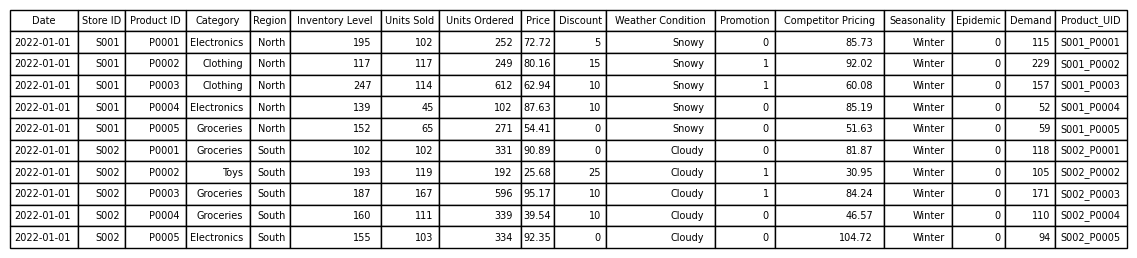

In [37]:
# This only to store some data tables for our presentation
import matplotlib.table as tbl
import os

# Load the data
file_path = "./Data/Transformed/inventory_management_feature_engineering.csv"
df = pd.read_csv(file_path)

# Filter for Store IDs S001 and S002
filtered_df = df[df['Store ID'].isin(['S001', 'S002'])]

# Take first 5 rows from each store
s001_sample = filtered_df[filtered_df['Store ID'] == 'S001'].head(5)
s002_sample = filtered_df[filtered_df['Store ID'] == 'S002'].head(5)

# Combine the two samples
sample_combined = pd.concat([s001_sample, s002_sample])

# Drop the 'Weekday' column
sample_combined = sample_combined.drop(columns=['Weekday'])

# Create figure
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')

# Create table
table = tbl.table(
    ax,
    cellText=sample_combined.values,
    colLabels=sample_combined.columns,
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1.0, 1.3)

# Adjust column widths
try:
    table.auto_set_column_width(col=list(range(len(sample_combined.columns))))
except AttributeError:
    print("auto_set_column_width not available in this matplotlib version")

# Save image
output_dir = "./Images"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, "Challenge_unique_identifier.png")
plt.savefig(image_path, bbox_inches='tight', dpi=700)

print(f"Saved to: {image_path}")
